C:\Users\USER\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


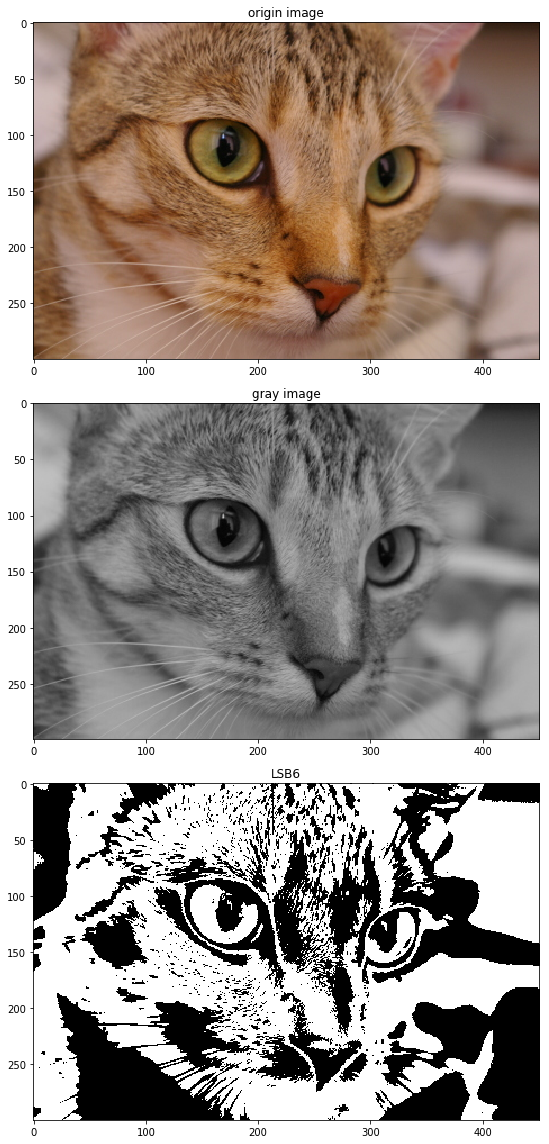

In [2]:
from skimage import io,data,img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np

def lsb(x):
    lsb_list=[]
    for i in range(0,8):
        lsb_list.append(x%(2**(i+1)))
    for j in range(7,0,-1):
        lsb_list[j]=lsb_list[j]-lsb_list[j-1]
        if lsb_list[j]!=0:
            if(lsb_list[j]%2)==0:
                lsb_list[j]=1
            else:
                lsb_list[j]=0
    return lsb_list

img=data.chelsea()
rows,cols,dims=img.shape
plt.figure(figsize=(16,16))

img_gray=img_as_ubyte(img.copy())
img_sample=img[:,:,0].copy()

for i in range(0,rows):
    for j in range(0,cols):
        sum=0.0
        for k in range(0,3):
            sum=sum+img[i,j,k]
        img_gray[i,j]=sum/3
        img_sample[i,j]=sum/3
        lsb_list=lsb(img_sample[i,j])
        if lsb_list[6]==1:
            img_sample[i,j]=255
        else:
            img_sample[i,j]=0

plt.subplot(3,1,1)
plt.title('origin image')
plt.imshow(img)

plt.subplot(3,1,2)
plt.title('gray image')
plt.imshow(img_gray)

plt.subplot(3,1,3)
plt.title('LSB6')
io.imshow(img_sample)
plt.show()

In [5]:
import math

def distance(color1,color2):
    dif=0
    for i in range(0,3):
        dif=dif+math.pow((color1[i]-color2[i]),2)
    print(math.sqrt(dif))
    
black=[0,0,0]
red=[255,0,0]
green=[0,255,0]
blue=[0,0,255]
pink=[255,175,175]
white=[255,255,255]

distance(black,white)
distance(white,pink)
distance(pink,black)

441.6729559300637
113.13708498984761
355.3519382246282


C:\Users\USER\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


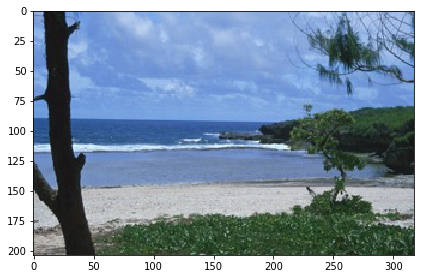

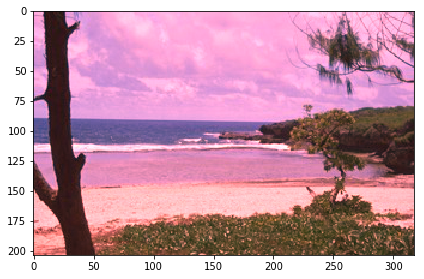

In [7]:
from skimage import io,data
import matplotlib.pyplot as plt

img=io.imread('C:\\Users/USER/pic/scene.jpg')
io.imshow(img)

rows,cols,dims=img.shape
img2=img.copy()

for i in range(0,rows):
    for j in range(0,cols):
        new_blue=2*img2[i,j,0]
        if new_blue>255:
            new_blue=255
        img2[i,j,0]=new_blue

plt.figure()
io.imshow(img2)
io.show()

C:\Users\USER\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


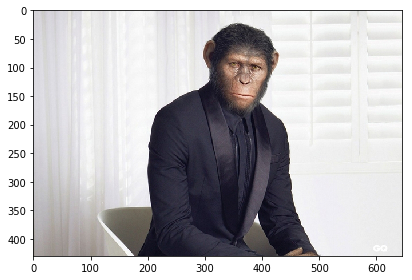

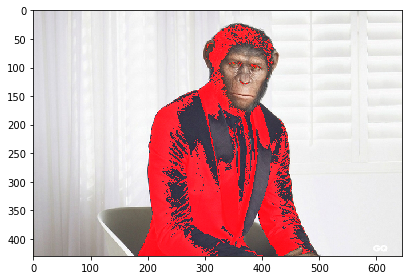

In [8]:
from skimage import io,data
import matplotlib.pyplot as plt
import math

def distance(color1,color2):
    dif=0
    for i in range(0,3):
        dif=dif+math.pow((color1[i]-color2[i]),2)
    return math.sqrt(dif)

def makeColor(image,brown):
    rows,cols,dims=image.shape
    for i in range(0,rows):
        for j in range(0,cols):
            if distance(image[i,j],brown)<50.0:
                image[i,j,0]=255
    return image

img=io.imread('C:\\Users/USER/pic/ape.jpg')
io.imshow(img)

brown=[45,25,15]
img2=makeColor(img,brown)
plt.figure()
io.imshow(img)
io.show()